# Modelo 2 Random Forest con las variables con importancia superior a 0.03, con balanceo de la variable objetivo con undersampler y los hiperparámetros aplicados directamente al modelo

### Carga y división de datos

In [37]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [38]:
# Carga de datos
df_impagos = pd.read_csv('../Datos/Crudos/Loan_default.csv')
df_impagos.drop(columns=['LoanID', 'LoanPurpose', 'EmploymentType', 'Education'], inplace=True)
df_impagos.sample(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default
86298,63,38791,209946,771,62,2,3.50,24,0.28,Divorced,No,No,Yes,0
233183,65,30225,242993,400,82,4,5.97,60,0.32,Divorced,No,Yes,Yes,0
242996,23,77835,199141,573,96,2,21.52,24,0.52,Married,Yes,No,Yes,1
24020,41,17677,10489,364,65,4,11.68,48,0.44,Divorced,No,Yes,No,0
217057,47,25809,245337,327,53,1,6.71,48,0.31,Single,No,Yes,Yes,1


In [39]:
# División de los datos
X = df_impagos.drop(columns=['Default'])
y = df_impagos.Default

# Balanceo con RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_over, y_over = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

### Creación de pipeline

In [40]:
# Dividir columnas categóricas
columnas_categoricas = X.select_dtypes(include='object').columns.to_list()

# Preprocesador con OneHotEncoder
preprocesador = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas)
    ], remainder='passthrough'
)

In [41]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=None, n_estimators=100, min_samples_split=5, min_samples_leaf=1))
    ]
)

In [42]:
# Entrenamiento
pipeline.fit(X_train, y_train)

c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['MaritalStatus',
                                                   'HasMortgage',
                                                   'HasDependents',
                                                   'HasCoSigner'])])),
                ('modelo',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_split=5,
                                        random_state=42))])

In [43]:
# Predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

### Evaluación del modelo

In [44]:
# Cálculo de accuracy train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Cálculo de accuracy train
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy train:', train_accuracy)
print('Accuracy test:', test_accuracy)

Accuracy train: 0.9984101748807631
Accuracy test: 0.6780575539568345


In [45]:
# Reporte de clasificación
reporte = classification_report(y_test, y_test_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      8867
           1       0.68      0.68      0.68      8925

    accuracy                           0.68     17792
   macro avg       0.68      0.68      0.68     17792
weighted avg       0.68      0.68      0.68     17792



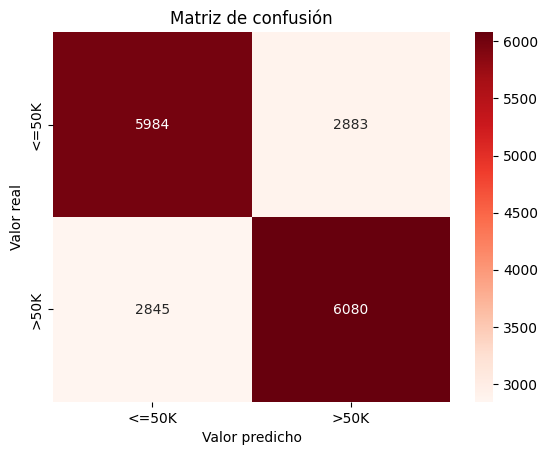

In [46]:
# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matriz_confusion, annot=True, fmt='d', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'], cmap='Reds')
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show();